In [18]:
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from data import COUNTRIES, get_all_data_and_labels
from indicators import *
from signal_math import *
from stats import *
from utils import *

plt.rcParams["figure.figsize"] = (10, 4)

# Initialize the data
all_data, all_labels = get_all_data_and_labels()
all_data_clean, all_labels_clean = get_all_data_and_labels(cleaned=True)

for i, label in enumerate(all_labels):
    vars()[label] = all_data[i]
    
for i, label in enumerate(all_labels_clean):
    vars()[label] = all_data_clean[i]
    
print(*all_labels, sep='\n')

# Create modified M2 data for Australia
m2_modified = m2_usd.copy()
m2_modified['AUS'] = (m1_usd['AUS'] + m3_usd['AUS']) / 2

m2_modified_clean = m2_usd_clean.copy()
m2_modified_clean['AUS'] = (m1_usd_clean['AUS'] + m3_usd_clean['AUS']) / 2

# Get daily returns benchmark
bond_rets_daily = bond_rets_local_fx.pct_change()

bond_rets_local_fx
equity_prices
curr_acct_nom_usd
curr_acct_pct_gdp
fx_trd_wts_nom
fx_trd_wts_real
fx_vs_usd
fx_to_usd
gdp_nom
gdp_real
short_rates
long_rates
core_cpi_sa
m1_usd
m2_usd
m3_usd


In [2]:
indicators = [None] * 6

In [60]:
indic_bond_premium_and_curve_height, _ = test_indicator(
    bond_premium_and_curve_height_indicator,
    index=long_rates.index,
    data=(long_rates, short_rates)
)
indicators[0] = indic_bond_premium_and_curve_height

In [4]:
indic_change_in_gdp, _ = test_indicator(
    change_in_gdp_indicator,
    index=gdp_nom.index,
    data=(gdp_nom,)
)
indicators[1] = indic_change_in_gdp

In [5]:
indic_monetary_base, _ = test_indicator(
    monetary_base_indicator,
    index=m2_modified.index,
    data=(m2_modified,)
)
indicators[2] = indic_monetary_base

In [6]:
indic_curr_acct, _ = test_indicator(
    curr_acct_pct_gdp_indicator,
    index=curr_acct_pct_gdp.index,
    data=(curr_acct_pct_gdp,)
)
indicators[3] = indic_curr_acct

In [7]:
indic_stock_bond, _ = test_indicator(
    stock_bond_performance_indicator,
    index=equity_prices.index,
    data=(equity_prices, bond_rets_local_fx)
)
indicators[4] = indic_stock_bond

In [61]:
indic_fx, _ = test_indicator(
    fx_appreciation_indicator,
    index=fx_to_usd.index,
    data=(fx_to_usd,),
    kwargs={'window': 4}
)
indicators[5] = indic_fx

<AxesSubplot:xlabel='date'>

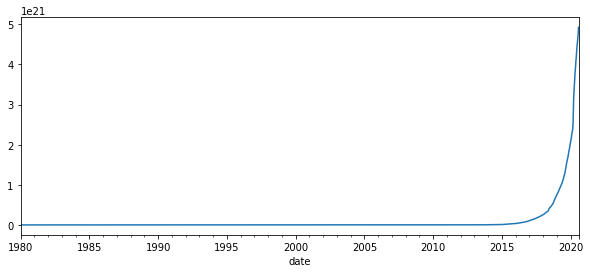

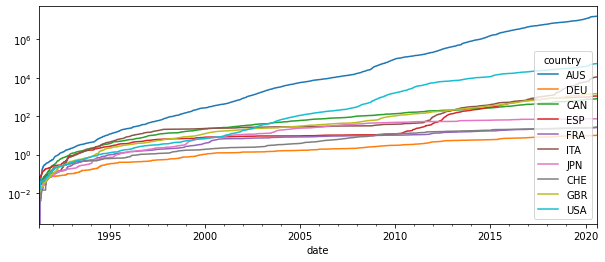

In [9]:
# Theoretical maximum given offsetting long and short positions
max_mask = bond_rets_daily.eq(bond_rets_daily.max(axis=1), axis=0)
min_mask = bond_rets_daily.eq(bond_rets_daily.min(axis=1), axis=0)

bond_rets_maximal_offset = bond_rets_daily.copy()
bond_rets_maximal_offset[~(max_mask | min_mask)] *= 0
bond_rets_maximal_offset[min_mask] *= -1
((1 + bond_rets_maximal_offset.sum(axis=1) / 2).cumprod() - 1).plot()
((1 + bond_rets_maximal_offset.dropna()).cumprod() - 1).plot(logy=True)